In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cryo_tools

/Data/Packages/Research/miniconda3/envs/cryo_tools/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/david/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Setup CryoTools

In [38]:
config = {}

config["IMAGES"] = {
    "N_PIXELS": 128,
    "PIXEL_SIZE": 1,
    "SIGMA": 1
    }

config["PROCESSING"] = {
    "SNR": 0.1,
    "DEFOCUS": 1.5,
    "AMP": 0.1,
    "B_FACTOR": 1.0
}

# Check that everything works

cryo_tools.utils.check_params(config)

# 2. Generating an image

In [22]:
atomic_coordinates = cryo_tools.utils.load_pdb("hsp90.pdb", filter="name CA")

# Optionally you can rotate the coordinates randomly or by providing a quaternion
#atomic_coordinates = cryo_tools.simulating.rot_coordinates(atomic_coordinates, quat=None)

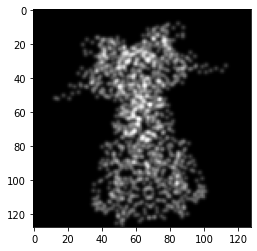

In [43]:
image = cryo_tools.simulating.gen_img(atomic_coordinates, config["IMAGES"])
plt.imshow(image, cmap="Greys_r")

# 3. Padding the image
Padding is only necessary if you want to shift the image. I pad before adding the CTF because it's easier that way.

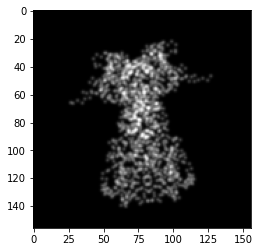

In [42]:
image_pad = cryo_tools.processing.pad_image(image, config["IMAGES"])
plt.imshow(image_pad, cmap="Greys_r")

# 4. Applying the CTF

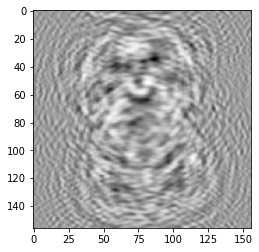

In [41]:
image_pad_ctf = cryo_tools.processing.apply_ctf(image_pad, config["IMAGES"], config["PROCESSING"])
plt.imshow(image_pad_ctf, cmap="Greys_r")

# 5. Doing a random shift

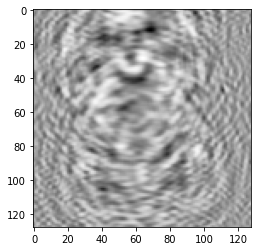

In [40]:
image_pad_ctf_shift = cryo_tools.processing.apply_random_shift(image_pad_ctf, config["IMAGES"])
plt.imshow(image_pad_ctf_shift, cmap="Greys_r")

# 6. Adding noise and normalizing

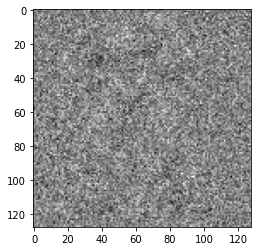

In [39]:
image_pad_ctf_shift_noise = cryo_tools.processing.add_noise(image_pad_ctf_shift, config["PROCESSING"])
image_pad_ctf_shift_noise_norm = cryo_tools.processing.gaussian_normalize_image(image_pad_ctf_shift_noise)

plt.imshow(image_pad_ctf_shift_noise_norm, cmap="Greys_r")